In [ ]:
 !pip install torchmetrics
 !pip install imageio
 !pip install tdqm
 !pip install matplotlib
 !pip install pandas
 !pip install scipy
 !pip install openpyxl
 !pip install ipywidgets
 !jupyter nbextension enable --py widgetsnbextension
 !pip install torchvision
 !pip install tenserflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tdqm: filename=tdqm-0.0.1-py3-none-any.whl size=1322 sha256=4fb1c1828c7f4c0b0ec3c193e2262dd0f831a5ae71f3e454a18deb63793586ab
  Stored in directory: /root/.cache/pip/wheels/37/31/b8/7b711038035720ba0df14376af06e5e76b9bd61759c861ad92
Successfully built tdqm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [ ]:
import os
import glob
import imageio
import random, shutil
from torchmetrics import AUROC, AveragePrecision, ConfusionMatrix
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from PIL import Image
import requests
import pandas as pd
import scipy as sp
import pywt
from scipy.signal import cwt
import scipy
import numpy
import numpy as Numpy

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fftshift

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


file_path = "/content/MID IR DATA-MIDO.xlsx"

df = pd.read_excel(file_path)

# عرض أول 5 صفوف من DataFrame
print(df.head())


   Wave Number       C1       C2       C3       C4       C5       C6       C7  \
0   7997.85475  0.01737  0.01094  0.00484  0.00456  0.01530  0.01408  0.01072   
1   7995.92616  0.01678  0.00894  0.00399  0.00622  0.01513  0.01417  0.01004   
2   7993.99757  0.01557  0.00801  0.00262  0.00737  0.01603  0.01615  0.01028   
3   7992.06899  0.01521  0.00811  0.00167  0.00621  0.01672  0.01799  0.01102   
4   7990.14040  0.01530  0.00825  0.00227  0.00399  0.01679  0.01824  0.01138   

        C8       C9  ...       T3       T4       T5       T6       T7  \
0  0.00988  0.00640  ...  0.00372  0.00448  0.00731  0.00682  0.00450   
1  0.01004  0.00658  ...  0.00394  0.00453  0.00742  0.00707  0.00377   
2  0.01034  0.00525  ...  0.00312  0.00428  0.00695  0.00726  0.00372   
3  0.01065  0.00396  ...  0.00226  0.00361  0.00669  0.00740  0.00407   
4  0.01030  0.00360  ...  0.00207  0.00363  0.00659  0.00648  0.00402   

        T8       T9      T10      T11      T12  
0  0.00416  0.01360  0.01

Slicing Scalograms

In [ ]:

data_directory = '/content/drive/MyDrive/Control/HeartDiseaseAnalysis/data'

scalogram_directory = '/content/drive/MyDrive/Control/HeartDiseaseAnalysis/scalograms'

columns_to_process = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6','C7','C8', 'C9', 'C10', 'C11', 'C12']


wave_number_min = 4000
wave_number_max = 8000


selected_frequencies = [40, 50, 60, 70, 80, 100, 120, 140]

if not os.path.exists(scalogram_directory):
    os.makedirs(scalogram_directory)


for column in columns_to_process:

    data = df[column]

    data = np.array(data)


    frequencies = np.array(selected_frequencies)


    wave_number = np.linspace(wave_number_min, wave_number_max, data.shape[0])

    scalogram = np.zeros((len(frequencies), len(wave_number)))


    for i, freq in enumerate(frequencies):
        scales = pywt.scale2frequency('morl', freq) * wave_number
        coefficients, _ = pywt.cwt(data, scales, 'morl', sampling_period=1)
        scalogram[i, :] = np.abs(coefficients).max(axis=0)


    plt.figure(figsize=(8, 6))
    plt.imshow(scalogram, cmap='viridis', aspect='auto', origin='lower',
               extent=[wave_number.min(), wave_number_max, selected_frequencies[0], selected_frequencies[-1]])
    plt.colorbar()
    plt.xlabel('Wave Number')
    plt.ylabel('Frequency')
    plt.title(f'Scalogram for {column}')
    plt.savefig(os.path.join(scalogram_directory, f'{column}_scalogram.png'), bbox_inches='tight')
    plt.close()


In [ ]:



data_directory = '/content/drive/MyDrive/Test/HeartDiseaseAnalysis/data'

scalogram_directory = '/content/drive/MyDrive/Test/HeartDiseaseAnalysis/scalograms'

columns_to_process = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6','T7', 'T8', 'T9', 'T10', 'T11', 'T12']


wave_number_min = 4000
wave_number_max = 8000

selected_frequencies = [40, 50, 60, 70, 80, 100, 120, 140]


if not os.path.exists(scalogram_directory):
    os.makedirs(scalogram_directory)

for column in columns_to_process:

    data = df[column]

    data = np.array(data)


    frequencies = np.array(selected_frequencies)

    wave_number = np.linspace(wave_number_min, wave_number_max, data.shape[0])

    scalogram = np.zeros((len(frequencies), len(wave_number)))


    for i, freq in enumerate(frequencies):
        scales = pywt.scale2frequency('morl', freq) * wave_number
        coefficients, _ = pywt.cwt(data, scales, 'morl', sampling_period=1)
        scalogram[i, :] = np.abs(coefficients).max(axis=0)


    plt.figure(figsize=(8, 6))
    plt.imshow(scalogram, cmap='viridis', aspect='auto', origin='lower',
               extent=[wave_number.min(), wave_number_max, selected_frequencies[0], selected_frequencies[-1]])
    plt.colorbar()
    plt.xlabel('Wave Number')
    plt.ylabel('Frequency')
    plt.title(f'Scalogram for {column}')
    plt.savefig(os.path.join(scalogram_directory, f'{column}_scalogram.png'), bbox_inches='tight')
    plt.close()


crop_scalograms

In [ ]:
import os
import shutil
from PIL import Image
def crop_scalograms(scalogram_directory, cropped_scalograms_directory):

    if os.path.exists(cropped_scalograms_directory):
        shutil.rmtree(cropped_scalograms_directory)

    os.makedirs(cropped_scalograms_directory, exist_ok=True)

    for filename in os.listdir(scalogram_directory):
        if filename.endswith(".png"):
            scalogram_path = os.path.join(scalogram_directory, filename)
            im = Image.open(scalogram_path)
            box = (67, 50, 560, 480)
            region = im.crop(box)
            cropped_path = os.path.join(cropped_scalograms_directory, filename)
            region.save(cropped_path)


scalogram_directory = '/content/drive/MyDrive/Test/HeartDiseaseAnalysis/scalograms'
cropped_scalograms_directory = '/content/drive/MyDrive/Test/HeartDiseaseAnalysis/cropped_scalograms'
crop_scalograms(scalogram_directory, cropped_scalograms_directory)


In [ ]:
import os
import shutil
from PIL import Image
def crop_scalograms(scalogram_directory, cropped_scalograms_directory):

    if os.path.exists(cropped_scalograms_directory):
        shutil.rmtree(cropped_scalograms_directory)

    os.makedirs(cropped_scalograms_directory, exist_ok=True)

    for filename in os.listdir(scalogram_directory):
        if filename.endswith(".png"):
            scalogram_path = os.path.join(scalogram_directory, filename)
            im = Image.open(scalogram_path)
            box = (67, 50, 560, 480)
            region = im.crop(box)
            cropped_path = os.path.join(cropped_scalograms_directory, filename)
            region.save(cropped_path)

scalogram_directory = '/content/drive/MyDrive/Control/HeartDiseaseAnalysis/scalograms'
cropped_scalograms_directory = '/content/drive/MyDrive/Control/HeartDiseaseAnalysis/cropped_scalograms'
crop_scalograms(scalogram_directory, cropped_scalograms_directory)


Preparing the data

In [27]:
import tensorflow as tf
import os

IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 4
N_CHANNELS = 3
N_CLASSES = 2

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    directory=os.path.join('/content/drive/MyDrive/Dataset'),
    shuffle=True,
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    subset="training",
    seed=0
)

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    directory=os.path.join('/content/drive/MyDrive/Dataset'),
    shuffle=True,
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    subset="validation",
    seed=0
)


Found 24 files belonging to 2 classes.
Using 17 files for training.
Found 24 files belonging to 2 classes.
Using 7 files for validation.


InvalidArgumentError: ignored

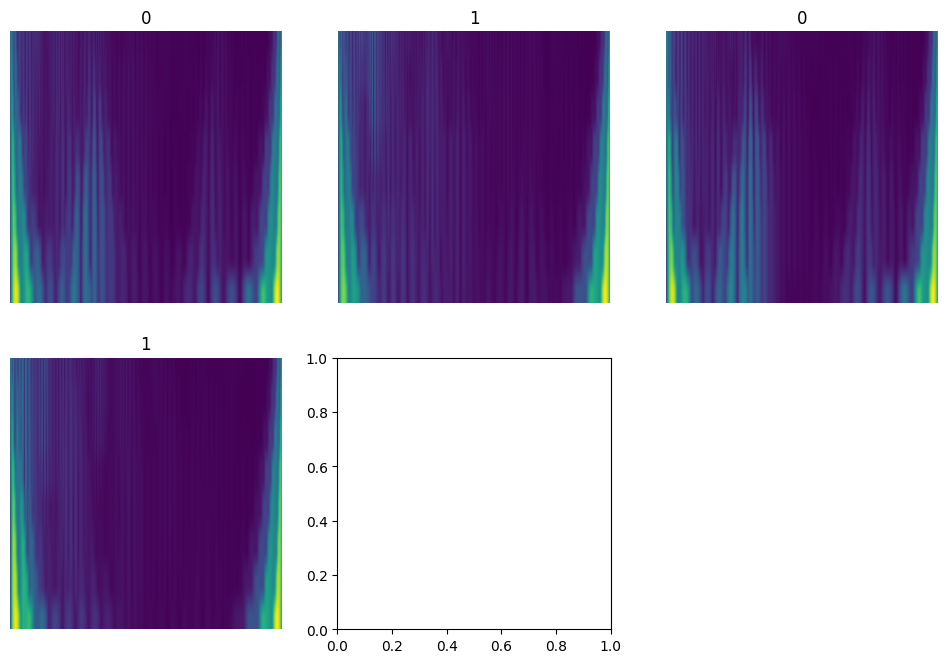

In [28]:
plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)

# Train model for 10 epochs, capture the history
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

model.save('we_model.h5')

In [ ]:
# Plot the loss curves for training and validation.
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Plot the accuracy curves for training and validation.
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Compute the final loss and accuracy
final_loss, final_acc = model.evaluate(valid_dataset, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 2.702573, final accuracy: 0.666667
